<a href="https://colab.research.google.com/github/Bclayts71/CS301-Project/blob/milestone-4/Data_Science_Project_Model_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/bnsreenu/python_for_microscopists.git

Cloning into 'python_for_microscopists'...
remote: Enumerating objects: 1356, done.
remote: Counting objects: 100% (517/517), done.
remote: Compressing objects: 100% (335/335), done.
remote: Total 1356 (delta 172), reused 483 (delta 169), pack-reused 839
Receiving objects: 100% (1356/1356), 109.39 MiB | 21.44 MiB/s, done.
Resolving deltas: 100% (443/443), done.
Checking out files: 100% (642/642), done.


In [2]:
!pip install nni

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip # download ngrok and unzip it
!unzip ngrok-stable-linux-amd64.zip
!mkdir -p nni_repo
!git clone https://github.com/microsoft/nni.git nni_repo/nni # clone NNI's offical repo to get examples

!./ngrok authtoken 2GpyrWdJ3R98hENLn3dpNmFspsO_4aXXGzg7szcyFrQcDYh6B
!nnictl create --config nni_repo/nni/examples/trials/mnist-pytorch/config.yml --port 5000 & 
get_ipython().system_raw('./ngrok http 5000 &')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56.0 MB 1.2 MB/s 
     |████████████████████████████████| 51 kB 8.3 MB/s 
     |████████████████████████████████| 106 kB 78.5 MB/s 
     |████████████████████████████████| 139 kB 69.0 MB/s 
     |████████████████████████████████| 127 kB 74.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
--2022-12-04 18:47:38--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  1

In [3]:
! curl -s http://localhost:4040/api/tunnels

{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://6866-34-86-231-134.ngrok.io","proto":"https","config":{"addr":"http://localhost:5000","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}},{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://6866-34-86-231-134.ngrok.io","proto":"http","config":{"addr":"http://localhost:5000","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


In [4]:
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

!kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery
!unzip semantic-segmentation-of-aerial-imagery.zip

Saving kaggle.json to kaggle.json
 30% 9.00M/29.6M [00:00<00:00, 68.1MB/s]
100% 29.6M/29.6M [00:00<00:00, 137MB/s] 
Archive:  semantic-segmentation-of-aerial-imagery.zip
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_001.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_002.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_003.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_004.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_005.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_006.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_007.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_008.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_009.jpg  
  inflating: Semantic segmentation dataset/Tile 1/masks/image_part_001.png  
  inflating: Semantic segmentation dataset/Tile 1/m

In [5]:
!pip install segmentation_models
import numpy as np
from matplotlib import pyplot as plt
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.8 MB/s 
Segmentation Models: using `keras` framework.


In [7]:
import os
import cv2
import numpy as np
from PIL import Image
from python_for_microscopists.simple_multi_unet_model import multi_unet_model, jacard_coef

In [8]:
image_dataset = []
mask_dataset = []
 
for path, subdirs, files in os.walk('Semantic segmentation dataset/'):
  subdirs.sort()
  dirname = path.split(os.path.sep)[-1]

  if dirname == 'images':
    images = os.listdir(path)
    images.sort()

    for i, image_name in enumerate(images):

      if image_name.endswith(".jpg"):
        image = cv2.imread(path+"/"+image_name, 1)

        SIZE_X = (image.shape[1]//256)*256
        SIZE_Y = (image.shape[0]//256)*256

        image = image[0:SIZE_X, 0:SIZE_Y]
        image = cv2.resize(image,(256,256))/255.0

        image = np.array(image)
        image_dataset.append(image)

  elif dirname == 'masks':
    masks = os.listdir(path)
    masks.sort()
    
    for i, mask_name in enumerate(masks):

      if mask_name.endswith(".png"):
        mask = cv2.imread(path+"/"+mask_name, 1)
        mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)

        SIZE_X = (mask.shape[1]//256)*256
        SIZE_Y = (mask.shape[0]//256)*256

        mask = mask[0:SIZE_X, 0:SIZE_Y]
        mask = cv2.resize(mask,(256,256))

        mask = np.array(mask)
        mask_dataset.append(mask)
  else:
    continue

image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [9]:
Building = '3C1098'
Land = '8429F6'
Road = '6EC1E4'
Vegetation = 'FEDD3A'
Water = 'E2A929'
Unlabeled = '9B9B9B'

Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4)))
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4)))
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4)))
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4)))
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4)))
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4)))

def rgb_to_2D_label(label):

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    
    label_seg = label_seg[:,:,0]
    
    return label_seg



labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label) 


labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)


In [10]:
from keras.utils import to_categorical
labels_cat = to_categorical(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)

In [11]:
from keras.metrics import Precision, Recall
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]


metrics=['accuracy', jacard_coef, Precision(), Recall()]

In [12]:
model = multi_unet_model(n_classes=6, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)
model.compile(optimizer='adam', loss=total_loss, metrics=metrics)

In [13]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/100
4/4 [==============================] - 45s 10s/step - loss: 0.9181 - accuracy: 0.2908 - jacard_coef: 0.1197 - precision: 0.2665 - recall: 0.0533 - val_loss: 0.8690 - val_accuracy: 0.4612 - val_jacard_coef: 0.1545 - val_precision: 0.7732 - val_recall: 0.1007
Epoch 2/100
4/4 [==============================] - 44s 11s/step - loss: 0.8610 - accuracy: 0.4467 - jacard_coef: 0.2375 - precision: 0.6510 - recall: 0.3578 - val_loss: 0.8509 - val_accuracy: 0.4640 - val_jacard_coef: 0.1966 - val_precision: 0.7192 - val_recall: 0.3144
Epoch 3/100
4/4 [==============================] - 39s 10s/step - loss: 0.8480 - accuracy: 0.4595 - jacard_coef: 0.2452 - precision: 0.6823 - recall: 0.3862 - val_loss: 0.8451 - val_accuracy: 0.4644 - val_jacard_coef: 0.2011 - val_precision: 0.7476 - val_recall: 0.3257
Epoch 4/100
4/4 [==============================] - 40s 10s/step - loss: 0.8411 - accuracy: 0.4614 - jacard_coef: 0.2490 - precision: 0.7095 - recall: 0.3905 - val_loss: 0.8374 - val_accuracy

In [27]:
!pip install tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import tensorflow_model_optimization as tfmot
pruning = tfmot.sparsity.keras.PolynomialDecay(
                        initial_sparsity=0, final_sparsity=0.6,
                        begin_step=0, end_step=100)
prunedModel = tfmot.sparsity.keras.prune_low_magnitude(model, pruning)
prunedModel.compile(optimizer='adam', loss=total_loss, metrics=metrics)

In [36]:
history2 = prunedModel.fit(X_train, y_train,
          batch_size=16,
          verbose=1,
          epochs=100,
          validation_data=(X_test, y_test),
          shuffle=False)

Epoch 1/100
4/4 [==============================] - 44s 11s/step - loss: 0.4775 - accuracy: 0.7729 - jacard_coef: 0.6330 - precision: 0.7847 - recall: 0.7652 - val_loss: 0.4426 - val_accuracy: 0.7647 - val_jacard_coef: 0.6013 - val_precision: 0.7771 - val_recall: 0.7554
Epoch 2/100
4/4 [==============================] - 41s 10s/step - loss: 0.4566 - accuracy: 0.7897 - jacard_coef: 0.6439 - precision: 0.8046 - recall: 0.7793 - val_loss: 0.4488 - val_accuracy: 0.7415 - val_jacard_coef: 0.5732 - val_precision: 0.7514 - val_recall: 0.7341
Epoch 3/100
4/4 [==============================] - 42s 10s/step - loss: 0.4337 - accuracy: 0.7939 - jacard_coef: 0.6529 - precision: 0.8050 - recall: 0.7868 - val_loss: 0.4914 - val_accuracy: 0.7137 - val_jacard_coef: 0.5449 - val_precision: 0.7226 - val_recall: 0.7071
Epoch 4/100
4/4 [==============================] - 41s 10s/step - loss: 0.4254 - accuracy: 0.7961 - jacard_coef: 0.6615 - precision: 0.8055 - recall: 0.7903 - val_loss: 0.4653 - val_accuracy

In [56]:
from tensorflow_model_optimization.python.core.clustering.keras.experimental import cluster
strippedPrunedModel = tfmot.sparsity.keras.strip_pruning(prunedModel)
cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization
clustering_params = {
  'number_of_clusters': 6,
  'preserve_sparsity': True,
  'cluster_centroids_init': CentroidInitialization.DENSITY_BASED
}

cluster_weights = cluster.cluster_weights
sparsity_clustered_model = cluster_weights(strippedPrunedModel, **clustering_params)


In [65]:
sparsity_clustered_model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
history3 = sparsity_clustered_model.fit(X_train, y_train,
          batch_size=16,
          verbose=1,
          epochs=50,
          validation_data=(X_test, y_test),
          shuffle=False)

Epoch 1/50
4/4 [==============================] - 51s 11s/step - loss: 0.5020 - accuracy: 0.7681 - jacard_coef: 0.6142 - precision: 0.7811 - recall: 0.7589 - val_loss: 0.4938 - val_accuracy: 0.7277 - val_jacard_coef: 0.5514 - val_precision: 0.7405 - val_recall: 0.7158
Epoch 2/50
4/4 [==============================] - 39s 10s/step - loss: 0.4930 - accuracy: 0.7744 - jacard_coef: 0.6192 - precision: 0.7882 - recall: 0.7646 - val_loss: 0.4699 - val_accuracy: 0.7427 - val_jacard_coef: 0.5576 - val_precision: 0.7601 - val_recall: 0.7292
Epoch 3/50
4/4 [==============================] - 39s 10s/step - loss: 0.4923 - accuracy: 0.7657 - jacard_coef: 0.6070 - precision: 0.7789 - recall: 0.7567 - val_loss: 0.4767 - val_accuracy: 0.7017 - val_jacard_coef: 0.5185 - val_precision: 0.7183 - val_recall: 0.6915
Epoch 4/50
4/4 [==============================] - 39s 10s/step - loss: 0.5168 - accuracy: 0.7443 - jacard_coef: 0.5845 - precision: 0.7588 - recall: 0.7334 - val_loss: 0.5154 - val_accuracy: 0.

In [96]:
y_pred=sparsity_clustered_model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 0s 339ms/step


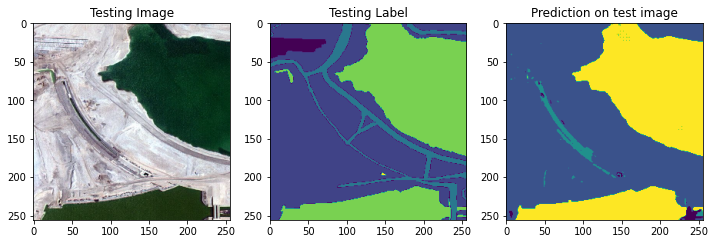

1/1 [==============================] - 0s 354ms/step


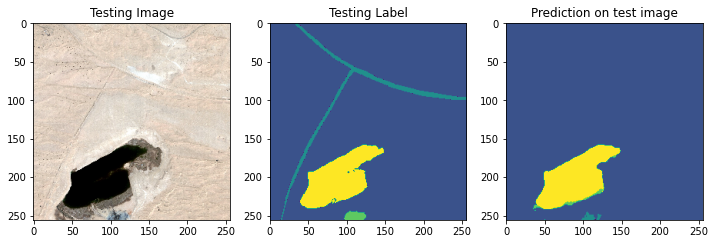

1/1 [==============================] - 0s 407ms/step


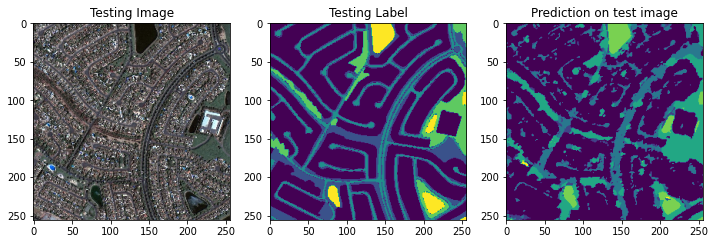

1/1 [==============================] - 0s 355ms/step


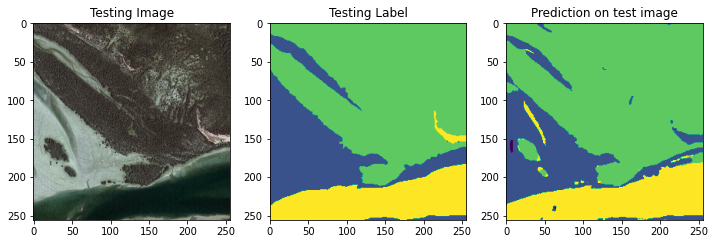

1/1 [==============================] - 0s 349ms/step


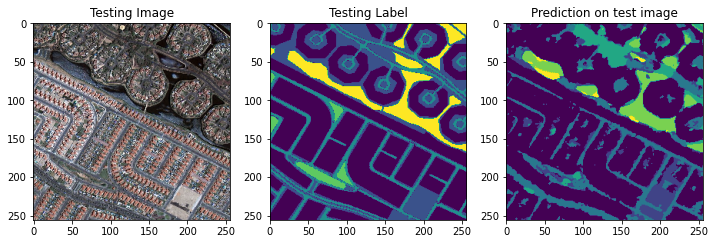

1/1 [==============================] - 0s 367ms/step


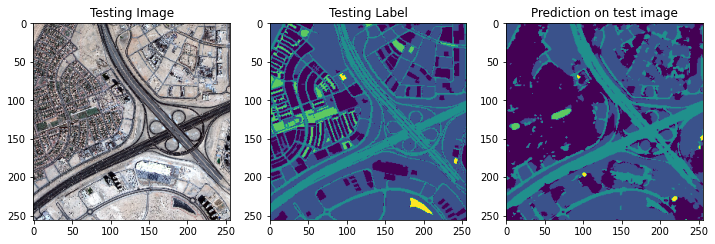

1/1 [==============================] - 0s 356ms/step


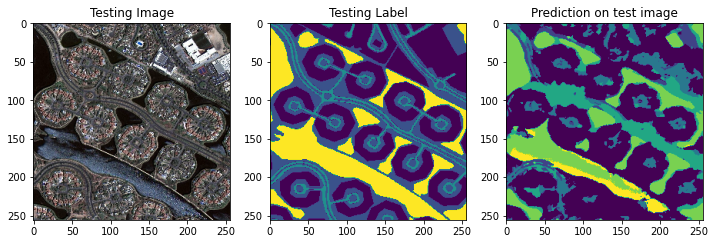

1/1 [==============================] - 0s 343ms/step


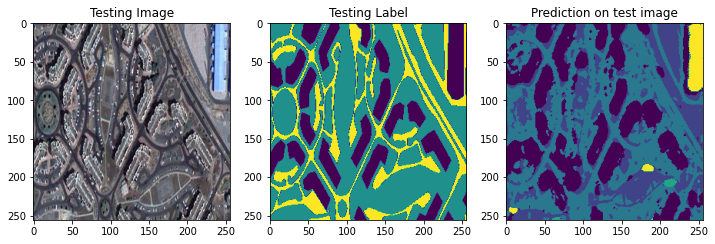

1/1 [==============================] - 0s 347ms/step


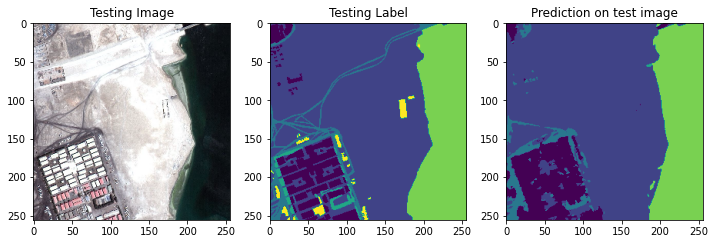

1/1 [==============================] - 0s 362ms/step


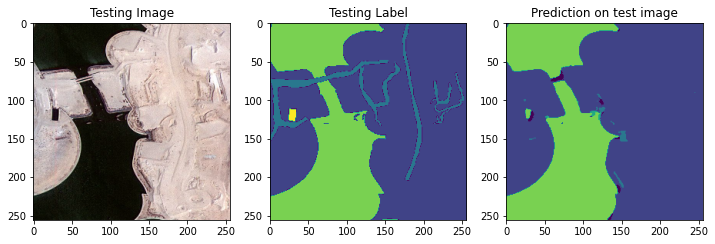

In [97]:
for i in (0, 1, 4, 5, 7, 9, 11, 12, 13, 14):
  test_img = X_test[i]
  ground_truth=y_test_argmax[i]

  test_img_input=np.expand_dims(test_img, 0)
  prediction = (sparsity_clustered_model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]
  plt.figure(figsize=(12, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth)
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(predicted_img)
  plt.show()

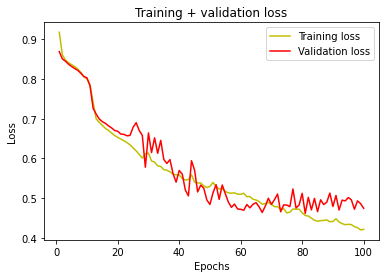

In [91]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training + validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

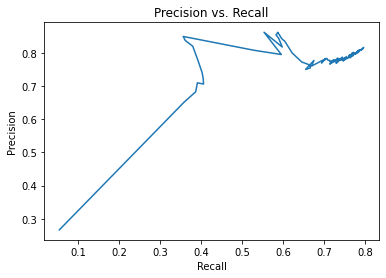

In [133]:
precision = history.history['precision']
recall = history.history['recall']
plt.plot(recall, precision)
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

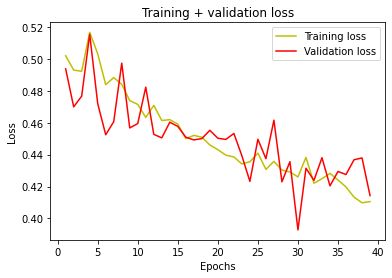

In [134]:
from matplotlib import pyplot as plt
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training + validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

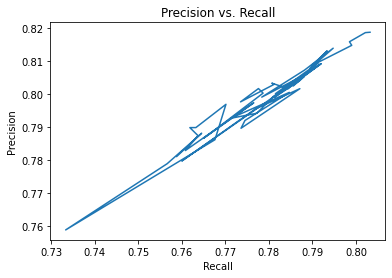

In [131]:
precision = history3.history['precision']
recall = history3.history['recall']
plt.plot(recall, precision)
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()